In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# Define the data types for each column
boolean_columns = ['related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue',
                   'security', 'military', 'child_alone', 'water', 'food', 'shelter', 'clothing', 'money', 
                   'missing_people', 'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport', 
                   'buildings', 'electricity', 'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
                   'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold', 'other_weather', 'direct_report']


int_columns = ['id']

string_columns = ['message', 'original', 'genre']

# Create a dictionary specifying the data types for each column
dtype_dict = {col: bool for col in boolean_columns}
dtype_dict.update({col: int for col in int_columns})
dtype_dict.update({col: str for col in string_columns})

# Create a pandas dataframe from the csv file. Specify the data types of the columns
df = pd.read_csv('data\\02_stg\\stg_disaster_messages.csv', dtype=dtype_dict)
df.head(n=2)

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,False,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False


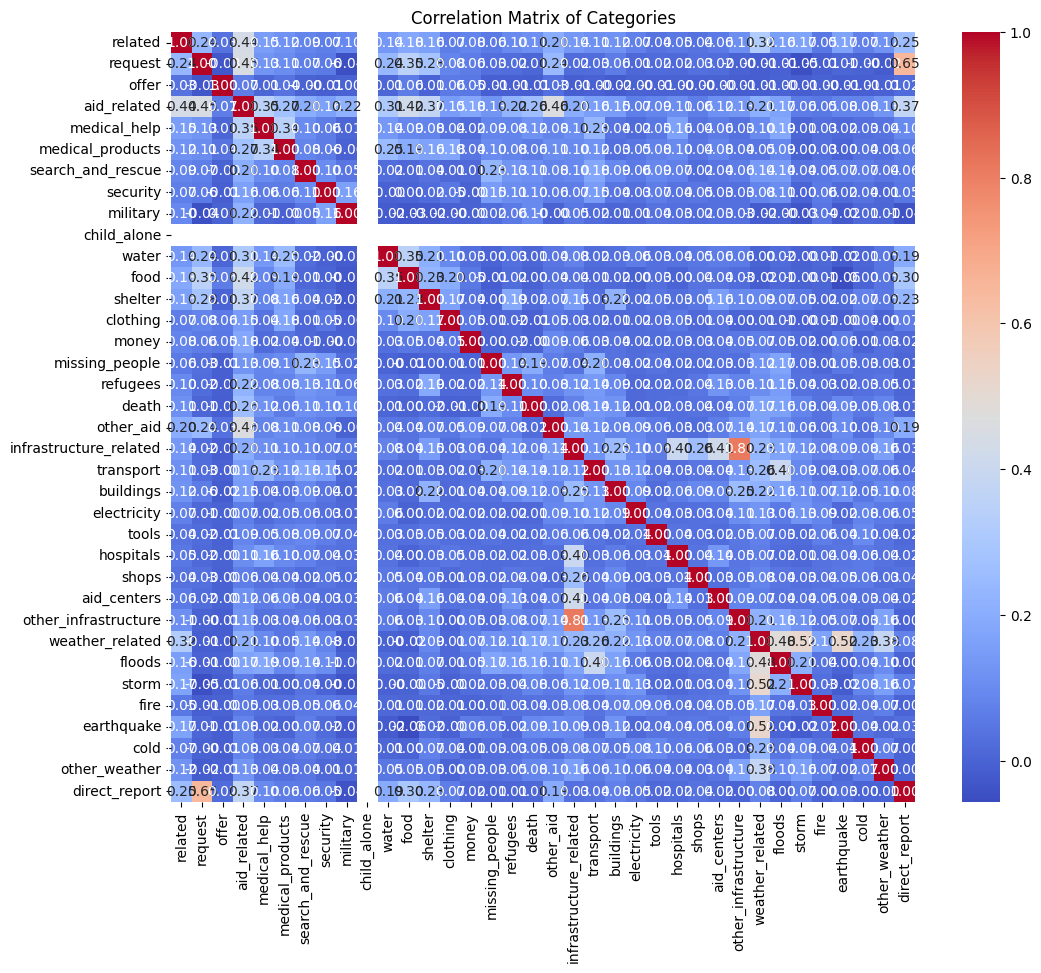

In [13]:
# List of categories for the heatmap (excluding 'id', 'message', 'original', 'genre')
categories = df.columns[4:]  # Adjust the index based on your df structure

# Calculate the sum for each category
category_sums = df[categories].sum().sort_values(ascending=False)

# Create a correlation matrix
corr_matrix = df[categories].corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Categories')
plt.show()


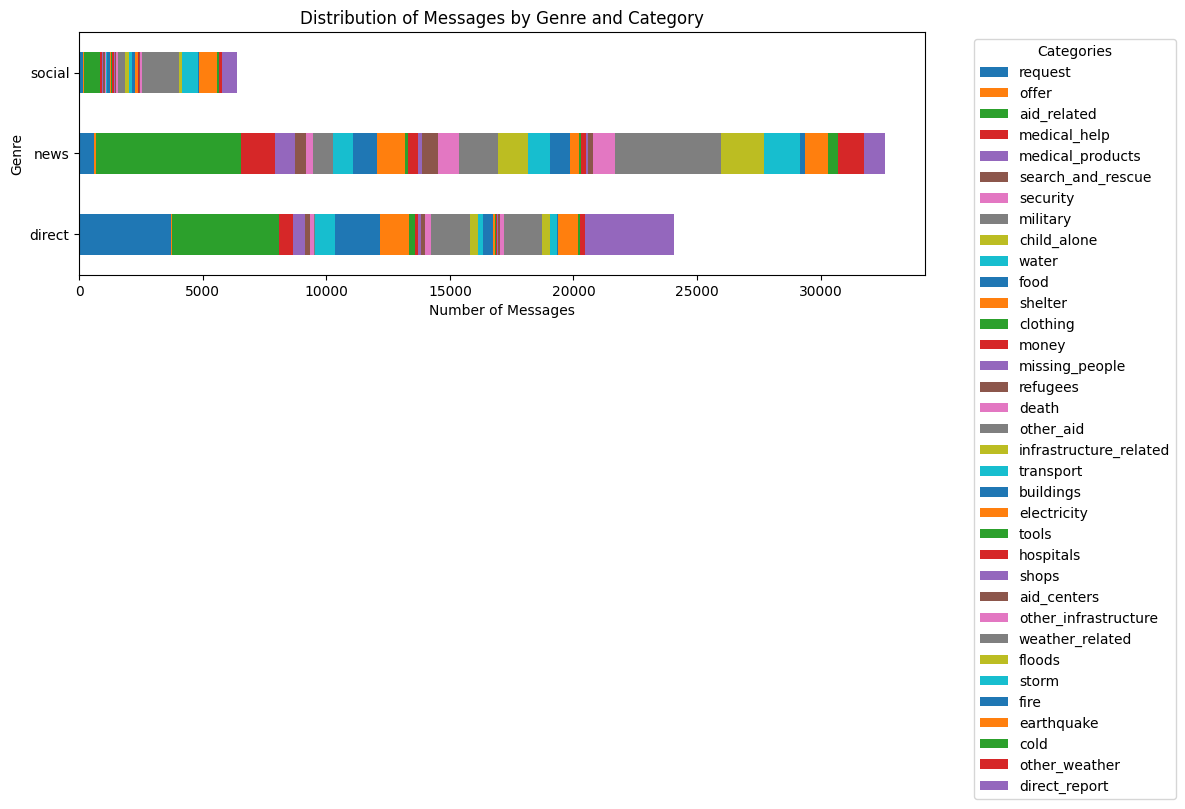

In [15]:
# Assuming 'categories' is a pandas Index of category names
categories = categories.drop('related')

# Filter the DataFrame to only include rows where 'related' equals 1
df_filtered = df[df['related'] == 1]

# Group by 'genre' on the filtered DataFrame
genre_groups = df_filtered.groupby('genre')[categories].sum()

# Plotting the stacked horizontal bar chart
genre_groups.plot(kind='barh', stacked=True, figsize=(12, 6))
plt.title('Distribution of Messages by Genre and Category')
plt.ylabel('Genre')
plt.xlabel('Number of Messages')
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [16]:
# Give me the first five rows  of df where genre is 'direct', related = 1 and offer = 1
offers_df = df[(df['genre'] == 'direct') & (df['related'] == 1) & (df['offer'] == 1)]

offers_df.head(n=5)

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
75,99,"I am a driver, a mechanic ,. I want to help","MWEN SE YON NMALIEN, CHOF, MEKANISYEN MWEN BEZ...",direct,1,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
256,309,How can we help the victims at Les Cayes?,COMMENT POUVONS-NOUS AIDER LES PERSONNES DEMEN...,direct,1,False,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
274,329,I'm the vice president of the association Rafa...,n sam ki vis prezidant rafadek nan ansagale no...,direct,1,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1499,1749,"Hi i speak english, if it's possible i would l...",Bonswa mwen pale angl si tout fwa ou ta konnen...,direct,1,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2601,2999,purified water. we leave at croix-des-bouquets...,purified water. we leave at croix-des-bouquets...,direct,1,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [30]:
#Give me 5 tweets that are related and direct reports
direct_reports_df = df[(df['genre'] == 'direct') & (df['related'] == 1) & (df['direct_report'] == 1)]
direct_reports_df.head(n=5)

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report,general_category,request_or_offer
7,16,"Please, we need tents and water. We are in Sil...",Tanpri nou bezwen tant avek dlo nou zon silo m...,direct,1,True,False,True,False,False,...,False,False,False,False,False,False,False,True,aid_related,request
9,18,I am in Croix-des-Bouquets. We have health iss...,"Nou kwadebouke, nou gen pwoblem sant m yo nan ...",direct,1,True,False,True,True,True,...,False,False,False,False,False,False,False,True,aid_related,request
10,20,"There's nothing to eat and water, we starving ...",Bon repo pa gen anyen menm grangou swaf,direct,1,True,False,True,True,True,...,True,True,False,False,False,False,False,True,weather_related,request
12,22,"I am in Thomassin number 32, in the area named...",Mwen thomassin 32 nan pyron mwen ta renmen jwe...,direct,1,True,False,True,False,False,...,False,False,False,False,False,False,False,True,aid_related,request
13,24,"Let's do it together, need food in Delma 75, i...",Ann fel ansanm bezwen manje nan delma 75 nan r...,direct,1,True,False,True,False,False,...,False,False,False,False,False,False,False,True,aid_related,request
